<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa/PSD_histogram_just_last_IMJ_BEST_sample_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [ ]:
Repetir = 40

In [ ]:
# New version change routine inside MarquesGabi_Routines
# Try to improve segmentation 
# New routine is called Segment_Filter_revisited_One... Two,Three, etc
# this exemple threshold 0.4


In [ ]:
#!pip install mahotas

In [ ]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/Doutorado


In [ ]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [ ]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines


In [ ]:
# Sample7 =[2, 5, 17] # 
# [2, 5, 17] sample 7---  [4,13,25] sample 3----[0, 3, 9] sample 8

In [ ]:
FILE='SugarSample08.zip'

img_name=[]
x_original = [] 

data_file ='csv'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        df_ImgJ =pd.read_csv(name,sep=';' )
        if( k > 0):
          df_old = df_ImgJ.copy()
        #df_ImgJ = pd.read_excel(name)
        df_ImgJ =pd.read_csv(name,sep=';' )
        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)
        if(k > 0):
          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)
        k = k + 1

In [ ]:
df_ImgJ.head()

,Id,Area
0,3,1.295
1,4,1.137
2,5,1.196
3,6,1.695
4,7,1.378


In [ ]:
name

'Resultado8_2.csv'

In [ ]:
f.namelist()

['Resultado8_4.csv', 'Resultado8_3.csv', 'Resultado8_2.csv']

In [ ]:
#df_ImgJ.head()

In [ ]:
#df_ImgJ.head()

In [ ]:
from Segment_Filter_Revival import Segmenta  # got image provided segmented

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [ ]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [ ]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [ ]:
Img_Size = 28

In [ ]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 6s 317ms/step - loss: 0.7109 - accuracy: 0.7464 - val_loss: 0.6932 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 3s 276ms/step - loss: 0.3544 - accuracy: 0.8571 - val_loss: 0.6932 - val_accuracy: 0.4898
Epoch 3/200
11/11 [==============================] - 3s 236ms/step - loss: 0.1966 - accuracy: 0.9184 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 4/200
11/11 [==============================] - 3s 253ms/step - loss: 0.1304 - accuracy: 0.9563 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 5/200
11/11 [==============================] - 2s 145ms/step - loss: 0.0889 - accuracy: 0.9592 - val_loss: 0.6936 - val_accuracy: 0.4898
Epoch 6/200
11/11 [==============================] - 2s 138ms/step - loss: 0.0648 - accuracy: 0.9767 - val_loss: 0.6931 - val_accuracy: 0.4898
Epoch 7/200
11/11 [==============================] - 2s 139ms/step - loss: 0.0530 - accuracy: 0.9796 - val_loss: 0.6927 - val_accuracy: 0.4898

In [ ]:
Y_test = yback(Y_test)

In [ ]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        69   3
1         3  72


In [ ]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.96      0.96      0.96        75

    accuracy                           0.96       147
   macro avg       0.96      0.96      0.96       147
weighted avg       0.96      0.96      0.96       147



In [ ]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
'''
img=ww[4] 
df=Segmenta(img)
df.shape
'''

'\nimg=ww[4] \ndf=Segmenta(img)\ndf.shape\n'

In [ ]:
Sample3 =[4,13,25]
Sample7 =[2, 5, 17]
Sample8 =[0, 3, 9]

for i in range(Repetir):
  k = 0
  for i in Sample8:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [ ]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,46.550529,45.655235,41.799572,25.128031,15.646243,43.338364,57.893917,68.874870,76.760704,81.492905,82.529037,79.387146,70.392471,68.308037,70.360611,75.922577,79.426758,81.296303,83.415932,73.081238,52.835392,55.920284,72.419601,80.610115,78.283188,74.132301,69.382103,68.727631,43.847279,43.142204,31.611492,14.685720,11.897120,31.016155,55.332420,66.290810,75.549614,79.777016,80.635735,81.930954,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260326,0.000000,0.844993,1.839201,0.727785,0.000000,0.000000,0.291267,0.124829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125895,0.023472
1,94.898041,93.604805,92.978989,91.298378,93.536392,94.992294,95.412445,95.775673,93.794815,93.213463,98.928398,103.210739,95.749931,50.030106,26.498756,34.967434,41.805569,47.344173,46.421795,42.994602,39.314968,35.470005,31.716358,29.177092,32.045864,43.338043,55.414024,63.607571,96.515762,94.769325,91.809280,90.348267,91.259293,92.417595,93.107903,93.492554,91.531311,90.537643,94.915169,100.431488,...,48.354572,50.019424,52.421024,54.996216,67.869263,94.564262,102.816528,103.236885,99.102722,99.088509,95.114662,93.916519,78.357887,105.370186,117.742722,120.128273,114.825172,114.410408,104.437866,79.274811,72.006607,69.064423,57.262840,43.942509,42.462341,46.146595,46.479465,45.094074,46.161583,46.239243,50.095825,55.955078,75.219284,93.622841,101.725945,102.811417,103.156586,101.476875,98.645210,95.148972
2,83.534401,84.855995,90.811188,102.987198,97.108795,84.657600,81.161598,82.761589,86.596802,88.673599,90.361595,92.953598,96.452789,98.689590,98.475197,96.679993,96.603195,96.631989,99.076790,98.292786,96.663994,92.881592,91.255997,90.833595,91.787193,90.788803,91.255997,90.743996,84.228798,84.603188,88.219193,90.993591,91.623985,86.001595,80.943993,83.612801,85.751999,87.137596,90.979187,93.654396,...,60.735992,64.550392,74.158401,101.598389,112.206398,117.067184,123.030388,120.617599,113.830391,113.043190,107.100792,87.465591,119.646400,115.393593,118.803185,116.377586,86.395195,62.321598,60.918396,61.788803,64.188797,65.081589,67.881607,68.646400,65.926392,60.662395,57.937592,59.159996,61.657597,68.454407,93.620796,107.262390,112.782394,114.942398,114.300789,114.499191,113.539192,109.763199,112.479996,114.623993
3,164.626465,163.931564,58.993610,63.368587,62.175335,46.153019,41.487198,41.374725,56.960072,63.965214,67.641022,69.294693,67.683861,69.028641,69.950462,70.976814,73.338829,74.266235,76.365616,78.445839,76.662598,74.113281,74.098648,74.500031,73.920029,71.818588,65.712936,51.240002,157.115753,155.346771,55.827515,67.730797,68.832169,48.502823,35.432762,42.615723,56.956970,62.311672,66.976257,69.393517,...,77.035713,82.500778,83.516960,91.674805,101.343475,103.744118,104.630539,108.813187,109.963921,110.285812,105.898270,95.143097,91.630981,104.604248,108.729805,107.405975,105.044701,97.242485,94.980095,90.279121,84.831978,76.476097,73.509079,70.144089,66.531532,63.135658,64.813812,70.944260,76.455269,80.019409,83.050461,90.226242,99.439453,101.763222,103.362648,104.327240,105.862732,108.495506,103.504318,92.557693
4,87.016739,90.258545,92.541985,96.727951,105.911911,115.700890,117.280762,79.483650,42.151623,45.314514,44.881989,47.144672,48.442444,51.637203,54.876778,59.830704,68.115097,80.087769,79.882416,82.664803,84.736671,83.750870,75.546692,68.308022,60.214306,57.939724,56.871624,55.429615,85.608002,88.666031,90.633141,94.954483,103.387131,117.159805,124.451546,92.636559,42.176483,43.887672,44.448563,45.081795,...,0.182565,0.602893,0.582712,0.320358,0.079121,0.036754,0.010024,0.000000,

In [ ]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [ ]:
#df_ann

In [ ]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [ ]:
img_graos.shape

(103, 785)

In [ ]:
prediction

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
img_graos.shape

(103, 785)

In [ ]:
Width=np.array(Width_new)

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_Revival import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [ ]:

#!git clone https://github.com/ucfilho/marquesgabi_out_2020
#%cd marquesgabi_out_2020
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

PSD_imageJ = 'Amostra8.csv' 
PSD_new = pd.read_csv(PSD_imageJ, sep=';')
print(PSD_new.head(3))
''''''

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines
   Id   Area
0   1  0.807
1   2  1.407
2   3  1.177


''

In [ ]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [ ]:
Width.shape

(103,)

In [ ]:
Width

array([169, 175, 127, 173, 159, 130, 142, 173, 167, 115, 134, 184, 105,
       145, 166, 183, 119, 122, 158, 169, 121, 132, 179, 172, 102, 102,
       107, 165, 141, 172, 178, 131, 163, 113, 188, 153, 142, 181, 196,
       161, 197, 170, 159, 137, 184, 166, 176, 130, 189, 129, 163, 141,
       123, 195, 155, 122, 177, 124, 144, 164, 108, 140, 193, 152, 173,
       111, 179, 142, 163, 122, 145, 154, 107, 198, 200, 170, 131, 164,
       146, 148, 170, 123, 197, 194, 199, 168, 165, 145, 160, 198, 153,
       198, 143, 171, 161, 110, 141, 199, 136, 111, 126, 135, 199])

In [ ]:
img_graos.shape

(103, 785)

In [ ]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
1,169.0,94.898041,93.604805,92.978989,91.298378,93.536392,94.992294,95.412445,95.775673,93.794815,93.213463,98.928398,103.210739,95.749931,50.030106,26.498756,34.967434,41.805569,47.344173,46.421795,42.994602,39.314968,35.470005,31.716358,29.177092,32.045864,43.338043,55.414024,63.607571,96.515762,94.769325,91.809280,90.348267,91.259293,92.417595,93.107903,93.492554,91.531311,90.537643,94.915169,...,48.354572,50.019424,52.421024,54.996216,67.869263,94.564262,102.816528,103.236885,99.102722,99.088509,95.114662,93.916519,78.357887,105.370186,117.742722,120.128273,114.825172,114.410408,104.437866,79.274811,72.006607,69.064423,57.262840,43.942509,42.462341,46.146595,46.479465,45.094074,46.161583,46.239243,50.095825,55.955078,75.219284,93.622841,101.725945,102.811417,103.156586,101.476875,98.645210,95.148972
2,175.0,83.534401,84.855995,90.811188,102.987198,97.108795,84.657600,81.161598,82.761589,86.596802,88.673599,90.361595,92.953598,96.452789,98.689590,98.475197,96.679993,96.603195,96.631989,99.076790,98.292786,96.663994,92.881592,91.255997,90.833595,91.787193,90.788803,91.255997,90.743996,84.228798,84.603188,88.219193,90.993591,91.623985,86.001595,80.943993,83.612801,85.751999,87.137596,90.979187,...,60.735992,64.550392,74.158401,101.598389,112.206398,117.067184,123.030388,120.617599,113.830391,113.043190,107.100792,87.465591,119.646400,115.393593,118.803185,116.377586,86.395195,62.321598,60.918396,61.788803,64.188797,65.081589,67.881607,68.646400,65.926392,60.662395,57.937592,59.159996,61.657597,68.454407,93.620796,107.262390,112.782394,114.942398,114.300789,114.499191,113.539192,109.763199,112.479996,114.623993
3,127.0,164.626465,163.931564,58.993610,63.368587,62.175335,46.153019,41.487198,41.374725,56.960072,63.965214,67.641022,69.294693,67.683861,69.028641,69.950462,70.976814,73.338829,74.266235,76.365616,78.445839,76.662598,74.113281,74.098648,74.500031,73.920029,71.818588,65.712936,51.240002,157.115753,155.346771,55.827515,67.730797,68.832169,48.502823,35.432762,42.615723,56.956970,62.311672,66.976257,...,77.035713,82.500778,83.516960,91.674805,101.343475,103.744118,104.630539,108.813187,109.963921,110.285812,105.898270,95.143097,91.630981,104.604248,108.729805,107.405975,105.044701,97.242485,94.980095,90.279121,84.831978,76.476097,73.509079,70.144089,66.531532,63.135658,64.813812,70.944260,76.455269,80.019409,83.050461,90.226242,99.439453,101.763222,103.362648,104.327240,105.862732,108.495506,103.504318,92.557693
4,173.0,87.016739,90.258545,92.541985,96.727951,105.911911,115.700890,117.280762,79.483650,42.151623,45.314514,44.881989,47.144672,48.442444,51.637203,54.876778,59.830704,68.115097,80.087769,79.882416,82.664803,84.736671,83.750870,75.546692,68.308022,60.214306,57.939724,56.871624,55.429615,85.608002,88.666031,90.633141,94.954483,103.387131,117.159805,124.451546,92.636559,42.176483,43.887672,44.448563,...,0.182565,0.602893,0.582712,0.320358,0.079121,0.036754,0.010024,0.000000,0.000000,0.016840,1.313308,0.652277,0.000000,0.000000,0.000000,0.000000,0.000000,1.089712,5.304052,3.051923,1.980220,0.552775,0.249858,0.221190,0.336597,0.322096,0.199739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016840,3.743526,1.124127
7,159.0,91.332664,90.335068,89.780151,88.666039,90.234283,95.862389,94.058334,93.311211,93.204933,94.711044,98.054070,107.596657,105.099518,65.797440,62.156723,61.660454,69.437363,92.845131,104.327599,115.639793,115.857201,100.027206,99.240303,101.477470,99.313202,89.258690,116.368248,118.819984,98.157547,96.093239,89.953568,85.993988,87.720383,94.646378,103.190186,96.342186,94.620155,94.869820,95.284958,...,90.066063,97.590828,99.768913,92.021835,68.702583,29.596298,35.996834,42.070408,

In [ ]:
PSD_new['Area']

0     0.807
1     1.407
2     1.177
3     1.289
4     1.743
      ...  
94    2.097
95    1.871
96    1.315
97    1.034
98    2.095
Name: Area, Length: 99, dtype: float64

In [ ]:
 df_ImgJ

,Id,Area
0,3,1.295
1,4,1.137
2,5,1.196
3,6,1.695
4,7,1.378
...,...,...
66,33,0.779
67,34,2.245
68,35,1.594
69,36,1.334


In [ ]:
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]



In [ ]:
len(Diameter_All)

103

In [ ]:
#

#PSD_new['Area'].shape

In [ ]:
#PSD_new.iloc[:,0]

In [ ]:
'''
# adding  diameters from first imageJ processed
Area2 = PSD_new['Area'].values
#k = 0
for A in Area2:
  Diam1.append((4*A/np.pi)**0.5)
  #k = k + 1 
'''

"\n# adding  diameters from first imageJ processed\nArea2 = PSD_new['Area'].values\n#k = 0\nfor A in Area2:\n  Diam1.append((4*A/np.pi)**0.5)\n  #k = k + 1 \n"

In [ ]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102
0,1.284074,1.203193,1.234016,1.469061,1.324584,1.143511,1.085827,0.961443,1.274119,1.075222,1.113614,1.211104,1.44899,1.332252,1.408893,1.533101,1.175357,1.889488,1.284074,1.236592,1.076996,1.380133,1.035407,1.074629,1.468194,1.269615,1.576504,1.450307,1.334639,1.220529,0.995918,1.690687,1.424621,1.303266,1.031094,1.019920,1.284074,1.203193,1.234016,1.469061,...,1.450307,1.334639,1.220529,0.995918,1.690687,1.424621,1.303266,1.031094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.202498,1.252354,0.922570,1.119377,1.378485,0.942619,1.044773,1.004108,1.102939,0.625649,0.684492,1.339101,0.96415,0.991254,1.162839,1.237930,0.811815,0.958519,1.326547,1.304543,0.739856,0.935610,1.295509,1.450060,0.732714,0.547573,0.574415,1.180791,1.090183,1.279083,1.463174,0.794719,1.074116,0.844755,1.327361,1.105274,0.992742,1.305105,1.223157,1.014734,...,1.077369,1.101004,0.676941,1.047902,1.085326,1.111982,0.691533,0.995375,1.14724,0.643949,1.178724,1.526078,1.273082,1.004583,0.981666,1.018671,1.018066,1.423349,0.990463,1.191945,1.475337,1.450927,1.199972,1.196402,1.033712,1.054347,1.342247,1.067512,1.615807,0.688368,1.178697,1.29646,0.610144,0.673013,1.590381,0.998826,0.733091,0.95982,0.80588,1.382898


In [ ]:
len(Diameter_All)

103

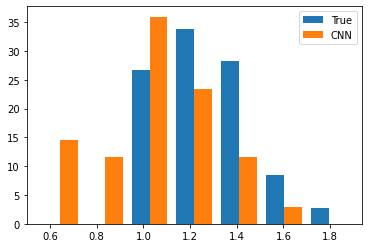

In [ ]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [ ]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.282563778317395 desvio= 0.20229889381038058 pontos= 71


In [ ]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 1.0608739247332724 desvio= 0.24591795585944948 pontos= 103
